本脚本学习cv2.findContours返回的hierarchy层次关系

结果显示：
- cv: : findContours 返回轮廓层次关系是[1, N, 4]，其中 N 是轮廓数量，4是表示层次关系的四元组：[下一个，上一个，First_Child，父]，元组内存储的是轮廓 Contours 的序号
	- **RETR_EXTERNAL**： 只寻找最高层级的轮廓 
    - **RETR_LIST**： 最简单的一种寻找方式，它不建立轮廓间的子属关系，也就是所有轮廓都属于同一层级， hierarchy 中的后两个值[First Child, Parent]都为-1 
    - **RETR_CCOMP**： 它把所有的轮廓只分为2个层级，不是外层的就是里层的 
    - **RETR_TREE**： 完整建立轮廓的层级从属关系 

In [1]:

# read code tools
# share in https://gist.github.com/WuShaogui/19c690bde2a0fe70b061d50e20129531
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

In [2]:
import numpy as  np
import cv2

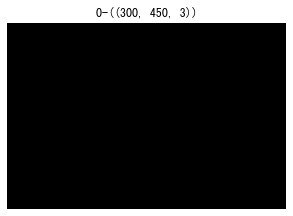

In [3]:
img1 = np.zeros((300, 450,3), 'uint8')
show_images([img1])

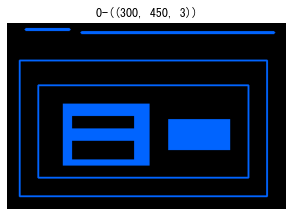

In [4]:
img1 = cv2.line(img1,[30,10],[100,10],(0,100,255),4)
img1 = cv2.line(img1,[120,15],[430,15],(0,100,255),4)
img1 = cv2.rectangle(img1, [20,60 ,400 ,220],(0,100,255),2)
img1 = cv2.rectangle(img1, [50 ,100, 340, 150],(0,100,255),2)
img1 = cv2.rectangle(img1, [90 ,130 ,140 ,100],(0,100,255),-1)
img1 = cv2.rectangle(img1, [260, 155, 100, 50],(0,100,255),-1)
img1 = cv2.rectangle(img1, [105 ,150 ,100 ,20],0,-1);
img1 = cv2.rectangle(img1, [105 ,190 ,100 ,30],0,-1);
show_images([img1])

In [5]:
contours,hierarchy=cv2.findContours(img1[...,-1],cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours[0].shape,contours[1].shape,len(contours),hierarchy.shape

((8, 1, 2), (8, 1, 2), 10, (1, 10, 4))

In [9]:
import copy

def render_image(contours):
    img2=copy.deepcopy(img1)
    for idx,contour in enumerate(contours):
        if idx==1 or idx==3:
            cv2.putText(img2,str(idx),(contour[0,0,0],contour[0,0,1]+15),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (255, 0, 0),2)
        else:
            cv2.putText(img2,str(idx),(contour[0,0,0],contour[0,0,1]),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (255, 0, 0),2)
    show_images([img2])

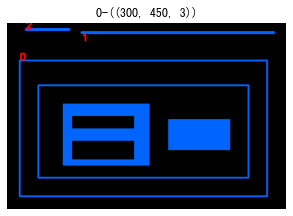

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [-1,  1, -1, -1]]], dtype=int32)

In [10]:
contours,hierarchy=cv2.findContours(img1[...,-1],cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
render_image(contours)
hierarchy

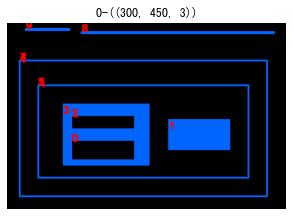

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [-1,  8, -1, -1]]], dtype=int32)

In [11]:
contours,hierarchy=cv2.findContours(img1[...,-1],cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
render_image(contours)
hierarchy

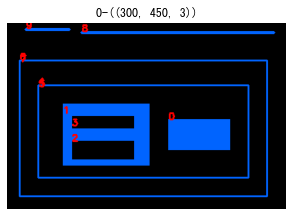

array([[[ 1, -1, -1, -1],
        [ 4,  0,  2, -1],
        [ 3, -1, -1,  1],
        [-1,  2, -1,  1],
        [ 6,  1,  5, -1],
        [-1, -1, -1,  4],
        [ 8,  4,  7, -1],
        [-1, -1, -1,  6],
        [ 9,  6, -1, -1],
        [-1,  8, -1, -1]]], dtype=int32)

In [12]:
contours,hierarchy=cv2.findContours(img1[...,-1],cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
render_image(contours)
hierarchy

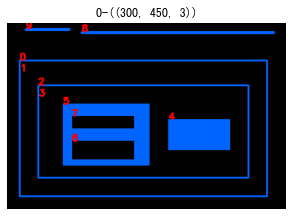

array([[[ 8, -1,  1, -1],
        [-1, -1,  2,  0],
        [-1, -1,  3,  1],
        [-1, -1,  4,  2],
        [ 5, -1, -1,  3],
        [-1,  4,  6,  3],
        [ 7, -1, -1,  5],
        [-1,  6, -1,  5],
        [ 9,  0, -1, -1],
        [-1,  8, -1, -1]]], dtype=int32)

In [13]:
contours,hierarchy=cv2.findContours(img1[...,-1],cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
render_image(contours)
hierarchy